# Case study on Unsupervised Learning
Do the following in the wine dataset.
1. Read the dataset to the python environment.
2. Try out different clustering models in the wine dataset.
3. Find the optimum number of clusters in each model and create the model with
the optimum number of clusters.

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset to the python environment

In [ ]:
wine_data=pd.read_csv('/content/Wine.csv')

In [ ]:
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Data analysis

In [ ]:
wine_data.shape

(178, 13)

There are 178 rows and 13 columns in the given dataset.

In [ ]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
wine_data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [ ]:
wine_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


The above shows numerical analysis on the given dataset.From the above we can understand that the mean and std are higher in case of proline and lower in case of Nonflavanoid_phenols.

In [ ]:
%whos

Variable    Type         Data/Info
----------------------------------
np          module       <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
pd          module       <module 'pandas' from '/u<...>ages/pandas/__init__.py'>
plt         module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
sns         module       <module 'seaborn' from '/<...>ges/seaborn/__init__.py'>
wine_data   DataFrame         Alcohol  Malic_Acid <...>\n[178 rows x 13 columns]


# Preprocessing

In [ ]:
# check missing values
wine_data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

There are not any missing values in the given dataset.

In [ ]:
#standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
wine_data=scaler.fit_transform(wine_data)
wine_data=pd.DataFrame(wine_data)
wine_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [ ]:
#Normalization
from sklearn.preprocessing import Normalizer
norm=Normalizer()
wine_data=norm.fit_transform(wine_data)

# Try out different clustering models in the wine dataset.

In [ ]:
#PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=2,random_state=42)
pca.fit(wine_data)
x_pca=pca.transform(wine_data)
x_pca.shape

(178, 2)

In [ ]:
pca.components_

array([[-0.19995859,  0.21483516, -0.03583603,  0.25059171, -0.14075692,
        -0.3942839 , -0.42049708,  0.30897799, -0.28884683,  0.03864312,
        -0.27036096, -0.36902382, -0.32867169],
       [-0.46787446, -0.25944656, -0.29903119,  0.03119847, -0.32430417,
        -0.01269628,  0.06357344, -0.05800528,  0.0194043 , -0.50757364,
         0.26661597,  0.22664747, -0.36081395]])

In [ ]:
#K-Means clustering
from sklearn.cluster import KMeans
model_kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
model_kmeans.fit(x_pca)
lables=model_kmeans.predict(x_pca)
print(lables)

[3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 1 3 1 3 3 3 3 3 3 3 3 3
 3 1 3 3 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 4 4 2 1 2 1 1 2 4 1 4 1 4 1
 1 2 2 4 1 1 2 1 2 0 1 2 2 2 4 2 4 4 4 2 2 1 4 2 1 1 2 2 2 2 2 4 2 4 2 1 1
 2 4 2 2 2 2 2 4 2 2 1 4 4 1 2 2 4 2 4 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


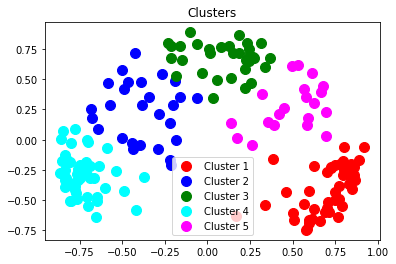

In [ ]:
plt.scatter(x_pca[lables==0,0], x_pca[lables==0,1], s=100, c='red', label= 'Cluster 1')
plt.scatter(x_pca[lables==1,0], x_pca[lables==1,1], s=100, c='blue', label= 'Cluster 2')
plt.scatter(x_pca[lables==2,0], x_pca[lables==2,1], s=100, c='green', label= 'Cluster 3')
plt.scatter(x_pca[lables==3,0], x_pca[lables==3,1], s=100, c='cyan', label= 'Cluster 4')
plt.scatter(x_pca[lables==4,0], x_pca[lables==4,1], s=100, c='magenta', label= 'Cluster 5')
plt.title('Clusters')
plt.legend()
plt.show()

In [ ]:
#Agglomerative Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="ward")
lables1=cluster.fit_predict(x_pca)
lables1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 4, 3, 4, 3,
       3, 4, 1, 3, 1, 3, 4, 0, 3, 4, 4, 1, 3, 4, 3, 3, 4, 2, 3, 3, 4, 4,
       1, 4, 1, 1, 1, 3, 3, 0, 1, 3, 3, 3, 3, 4, 4, 4, 3, 1, 4, 1, 4, 3,
       3, 4, 1, 4, 4, 4, 4, 4, 1, 4, 3, 0, 1, 1, 3, 4, 4, 1, 4, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

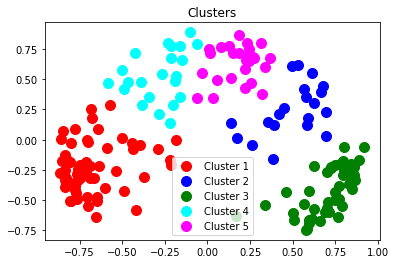

In [ ]:
plt.scatter(x_pca[lables1==0,0], x_pca[lables1==0,1], s=100, c='red', label= 'Cluster 1')
plt.scatter(x_pca[lables1==1,0], x_pca[lables1==1,1], s=100, c='blue', label= 'Cluster 2')
plt.scatter(x_pca[lables1==2,0], x_pca[lables1==2,1], s=100, c='green', label= 'Cluster 3')
plt.scatter(x_pca[lables1==3,0], x_pca[lables1==3,1], s=100, c='cyan', label= 'Cluster 4')
plt.scatter(x_pca[lables1==4,0], x_pca[lables1==4,1], s=100, c='magenta', label= 'Cluster 5')
plt.title('Clusters')
plt.legend()
plt.show()

# Find the optimum number of clusters in each model and create the model with the optimum number of clusters.

In [23]:
#PCA
pca1 = PCA(n_components = 0.95)
pca1.fit(wine_data)
x_pca1 = pca1.transform(wine_data)

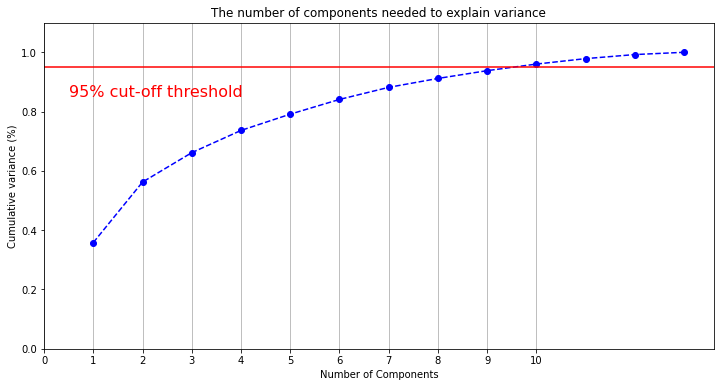

In [26]:
pca = PCA().fit(wine_data)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 14, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

from the above graph,we can understand that the number of components are 10.



In [28]:
# kmeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x_pca1)
  wcss.append(kmeans.inertia_)
  print(kmeans.inertia_)

170.61006583601727
117.9508337183585
87.74692344767985
80.04631327294675
73.83622225978132
70.39494208095641
66.37894248698123
62.78959841775743
60.15441286502866
57.97620527920665


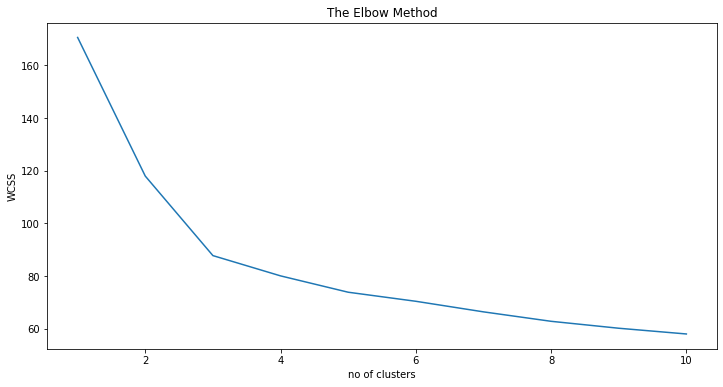

In [29]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(x_pca1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(x_pca1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.28269410001477535
For n_clusters=3, the silhouette score is 0.3151422792751764
For n_clusters=4, the silhouette score is 0.28242882585716633
For n_clusters=5, the silhouette score is 0.26928499169496256
For n_clusters=6, the silhouette score is 0.21136272403486372
For n_clusters=7, the silhouette score is 0.219541545142874
For n_clusters=8, the silhouette score is 0.17274091607635658


From the above, we can understand that the optimum number of clusters are 3

In [32]:
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(x_pca1)
lables2=model_kmeans.predict(x_pca1)
print(lables2)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 1 0 1 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


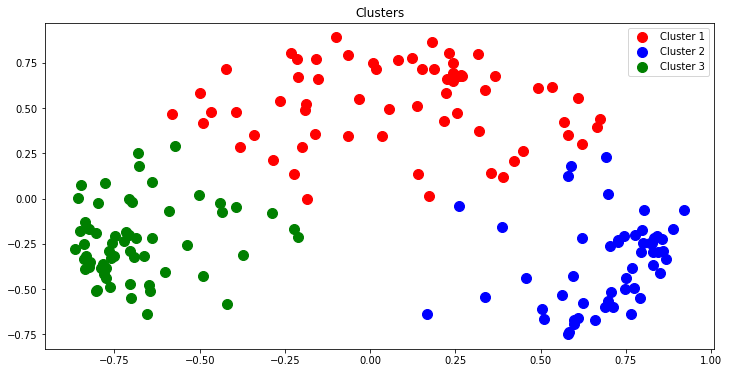

In [37]:
plt.scatter(x_pca1[lables2==0,0], x_pca1[lables2==0,1], s=100, c='red', label= 'Cluster 1')
plt.scatter(x_pca1[lables2==1,0], x_pca1[lables2==1,1], s=100, c='blue', label= 'Cluster 2')
plt.scatter(x_pca1[lables2==2,0], x_pca1[lables2==2,1], s=100, c='green', label= 'Cluster 3')
plt.title('Clusters')
plt.legend()
plt.show()

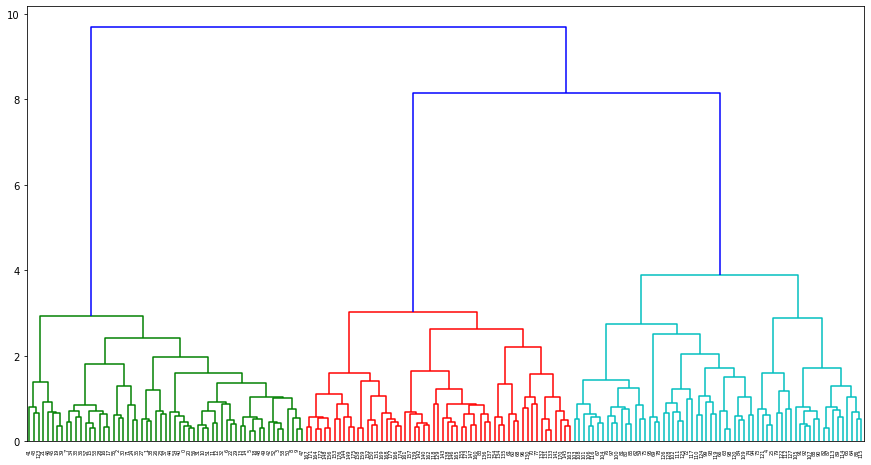

In [34]:
#Agglomerative Hierarchical analysis
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(x_pca1,method="ward")
plt.figure(figsize=(15,8))
dendrogram(linked,orientation="top",distance_sort="ascending",show_leaf_counts=True)
plt.show()

From the above,we can understand that the optimum number of clusters are 3

In [36]:
cluster=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
lables3=cluster.fit_predict(x_pca1)
lables3

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

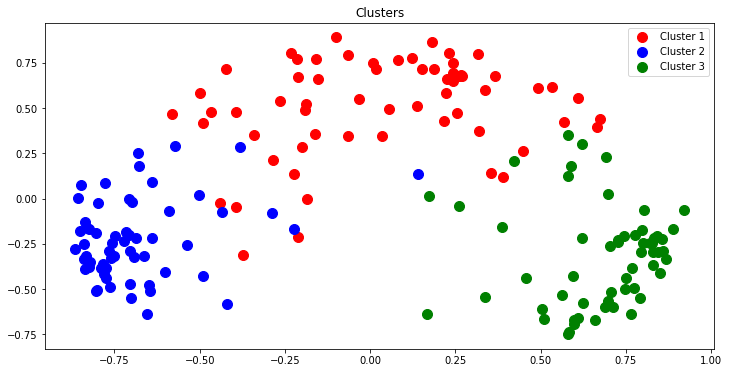

In [38]:
plt.scatter(x_pca1[lables3==0,0], x_pca1[lables3==0,1], s=100, c='red', label= 'Cluster 1')
plt.scatter(x_pca1[lables3==1,0], x_pca1[lables3==1,1], s=100, c='blue', label= 'Cluster 2')
plt.scatter(x_pca1[lables3==2,0], x_pca1[lables3==2,1], s=100, c='green', label= 'Cluster 3')
plt.title('Clusters')
plt.legend()
plt.show()

From the above, we can understand that the number of clusters are changed after computing optimum number of clusters in case of k_means and agglomerative clustering